In [1]:
%matplotlib inline

/Users/joncomo/miniconda2/envs/py27/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
from matplotlib import pyplot as plt
import numpy as np
from ipywidgets import interact
from IPython.display import clear_output

In [5]:
def rbf(x, c):
    return np.exp(-1 * (x - c)**2)

def rbf_wrt_c(x, c):
    return 2.0 * rbf(x, c) * (x - c)

def rbf_wrt_x(x, c):
    return -2.0 * rbf(x, c) * (x - c)

<function __main__.vis>

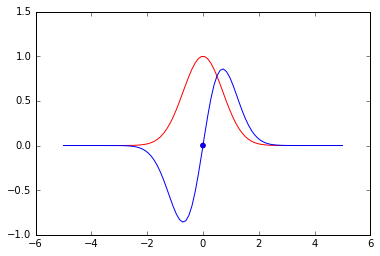

In [27]:
def vis(c, t):
    X = np.linspace(-5, 5, 90)
    #C = np.linspace(-5, 5, 90)
    f = plt.plot(X, rbf(X, c), 'r', X, rbf_wrt_c(X, c), 'b')
    plt.scatter([c, t], [0, 0], color=['r', 'b'])
    
interact(vis, c=(-5, 5, .5), t=(-5, 5, .5))

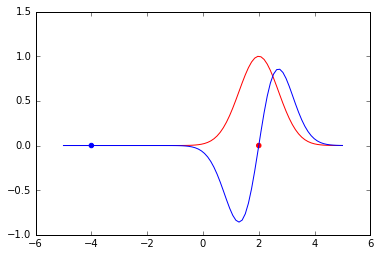

In [48]:
x = -4
c = 2

vis(c, x)

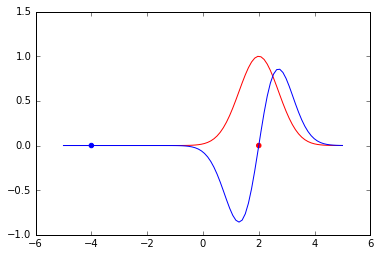

In [49]:
for i in range(20):
    c += rbf_wrt_c(x, c) * .2
    
    clear_output(wait=True)
    vis(c, x)
    plt.show()

In [53]:
def vis_multiple(C):
    X = np.linspace(-5, 5, 90)
    y = np.sum([rbf(X, c) for c in C], axis=0)
    f = plt.plot(X, y, 'r')
    for c in C:
        plt.plot(X, rbf(X, c), 'r')

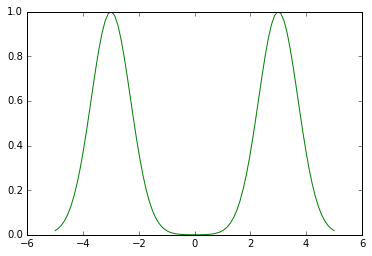

In [51]:
def target_fn(x):
    return np.exp(-(x-3)**2) + np.exp(-(x+3)**2)
    #return np.sin(x * 2) + 1

def vis_target_fn():
    X = np.linspace(-5, 5, 90)
    f = plt.plot(X, target_fn(X), 'g')
    
vis_target_fn()

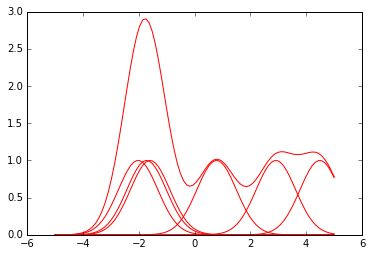

In [62]:
C = np.random.random_sample(6) * 10 - 5
vis_multiple(C)

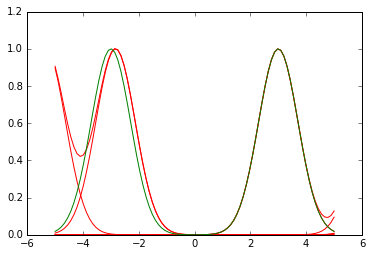

In [65]:
for i in range(100):
    # pick a random x
    x = np.random.random_sample(1) * 10.0 - 5.0

    # check output of all rbfs
    out = np.sum([rbf(x, c) for c in C])
    
    # get first delta
    delta = target_fn(x) - out
    
    # get grad wrt c of current x
    
    C_grad = np.array([rbf_wrt_c(x, c) for c in C])
    C += delta * C_grad.reshape(C.shape)
    
    clear_output(wait=True)
    vis_multiple(C)
    vis_target_fn()
    plt.show()